<a href="https://colab.research.google.com/github/bsjhx/ai-notebooks-for-learning/blob/main/Practical_Deep_Learning_chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Deep Learning - chapter 1
This is my rework of first Jupyter notebook. Here I gonna classify 4 categories from underwater world:
- orca
- shark
- starfish
- seahorse

Fristly we have to install two libraries, icrawler for searching and downloading photos from internet, fastai to create our first model!

In [2]:
!pip install icrawler fastai -qqq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.4 MB/s eta 0:00:00


In [3]:
NUMBER_OF_PHOTOS = 10

CATEGORIES = ['orca', 'shark', 'starfish', 'seahorse']

In [12]:
import os
from pathlib import Path # Import Path here

path2 = Path('.')
os.listdir(str(path2))

['.config', 'sample_data']

In [13]:
from icrawler.builtin import GoogleImageCrawler
from pathlib import Path
import os

path = Path('data')

for category in CATEGORIES:
  dest = (path/category)
  print(f'Destination: [{dest}]')
  dest.mkdir(exist_ok=True, parents=True)

  google_crawler = GoogleImageCrawler(storage={'root_dir': dest})
  google_crawler.crawl(keyword=category, max_num=NUMBER_OF_PHOTOS)

  print(f'Number of images for {category}: {len(os.listdir(str(dest)))}')

resize_images(path, max_size=400, dest=path, recurse=True)
print(f"Photos resized!")

Destination: [data/orca]


ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Typical_killer_whale_markings.png
ERROR:downloader:Response status code 401, file https://i.guim.co.uk/img/media/a071cec0aeeb9819b0154d258b5a2d34d9d77045/0_193_5882_3530/master/5882.jpg


Number of images for orca: 20
Destination: [data/shark]


ERROR:downloader:Response status code 404, file https://i0.wp.com/www.sciencenews.org/wp-content/uploads/2023/06/062623_CG_Megalodon_feat.jpg
ERROR:downloader:Response status code 403, file https://cdn.divessi.com/cached/blog/Wildlife_Silvertip_Shark_Shark_iStock-Lindsey-Dougherty.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/White_shark.jpg


Number of images for shark: 20
Destination: [data/starfish]


ERROR:downloader:Response status code 401, file https://i.guim.co.uk/img/media/a7934b611a8b0713a1c32e69a62877e76ed8c13a/0_319_5315_3189/master/5315.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Starfish.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/025/265/717/non_2x/starfish-icon-outline-isolated-on-square-white-background-simple-flat-sea-marine-animal-creatures-outlined-cartoon-drawing-free-vector.jpg
ERROR:downloader:Response status code 404, file https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSajQRVv8TvDb_8jCfrVM2jpg


Number of images for starfish: 20
Destination: [data/seahorse]


ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Hippocampus_hippocampus_%28on_Ascophyllum_nodosum%29.jpg
ERROR:downloader:Response status code 403, file https://cdn1.tedsby.com/tb/large/storage/4/4/7/447070/cute-handmade-other-seahorse-by-yulia-leonovich.jpg
ERROR:downloader:Response status code 403, file https://www.girlsthatscuba.com/wp-content/uploads/2022/07/seahorse-facts.png


Number of images for seahorse: 20


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

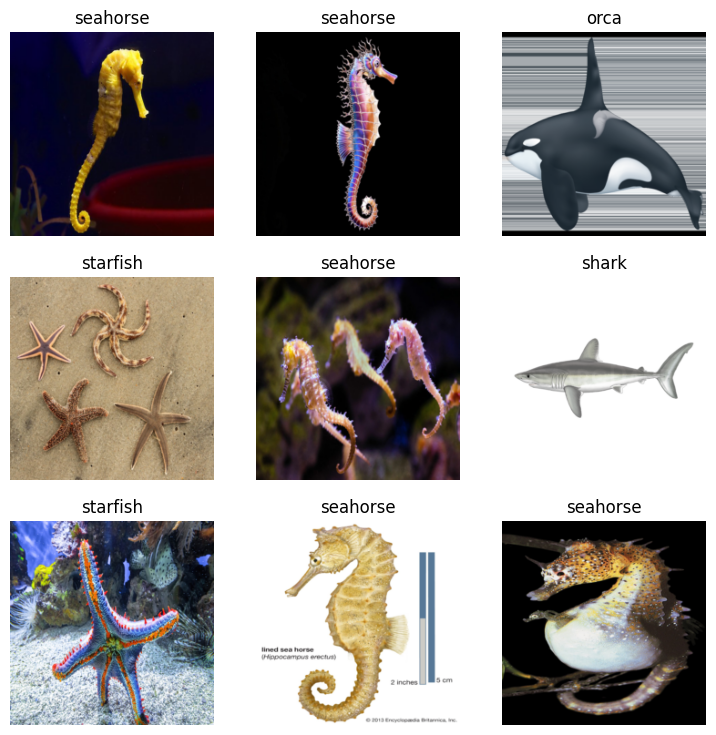

In [20]:
from fastai.vision.all import *

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=[Resize(224, method='squish')]
)

dls = dblock.dataloaders(path, bs=32)

dls.show_batch()

In [21]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 79.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.572974,1.269337,0.312500,00:26


epoch,train_loss,valid_loss,error_rate,time
0,1.292272,0.707517,0.187500,00:26
1,0.809424,0.278372,0.125000,00:25
2,0.579048,0.129850,0.062500,00:24
3,0.434378,0.072462,0.062500,00:24


In [24]:
classes = list(learn.dls.vocab)

print(classes)

['orca', 'seahorse', 'shark', 'starfish']


Saving image_2025-07-24_125149263.png to image_2025-07-24_125149263.png
File uploaded: image_2025-07-24_125149263.png


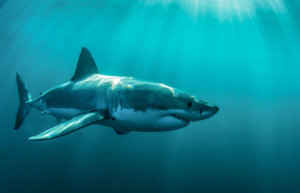

In [22]:
from fastai.vision.all import *
from IPython.display import Image, display
from google.colab import files

uploaded = files.upload()

uploaded_filenames = list(uploaded.keys())
first_filename = uploaded_filenames[0] if uploaded_filenames else None

print('File uploaded: {name}'.format(name=first_filename))

# Load the image
img = PILImage.create(first_filename)

# Resize the image
resized_img = img.to_thumb(300)

# Display the resized image
display(resized_img)

This is a shark (Confidence: 96.53%)


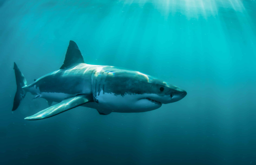

In [23]:
pred, _, probs = learn.predict(img)
print(f"This is a {pred} (Confidence: {probs.max().item():.2%})")
img.to_thumb(256, 256)